# Support Vector Classifier

In [2]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

TEST_SIZE = 0.2

def load_data(filename):
    evidence = []
    labels = []

    month_index = {
        "Jan": 0, "Feb": 1, "Mar": 2, "Apr": 3, "May": 4, "June": 5,
        "Jul": 6, "Aug": 7, "Sep": 8, "Oct": 9, "Nov": 10, "Dec": 11
    }

    with open(filename) as f:
        reader = csv.DictReader(f)
        for row in reader:
            evidence.append([
                int(row["Administrative"]),
                float(row["Administrative_Duration"]),
                int(row["Informational"]),
                float(row["Informational_Duration"]),
                int(row["ProductRelated"]),
                float(row["ProductRelated_Duration"]),
                float(row["BounceRates"]),
                float(row["ExitRates"]),
                float(row["PageValues"]),
                float(row["SpecialDay"]),
                month_index[row["Month"]],
                int(row["OperatingSystems"]),
                int(row["Browser"]),
                int(row["Region"]),
                int(row["TrafficType"]),
                1 if row["VisitorType"] == "Returning_Visitor" else 0,
                1 if row["Weekend"] == "TRUE" else 0,
            ])
            labels.append(1 if row["Revenue"] == "TRUE" else 0)

    return evidence, labels

def evaluate(labels, predictions):
    t_positive = float(0)
    t_negative = float(0)
    sensitivity = float(0)
    specificity = float(0)

    for label, prediction in zip(labels, predictions):
        if label == 0:
            t_negative += 1
            if label == prediction:
                specificity += 1

        if label == 1:
            t_positive += 1
            if label == prediction:
                sensitivity += 1

    sensitivity /= t_positive
    specificity /= t_negative

    return sensitivity, specificity

# Replace 'Data/activity_data.csv' with the path to your CSV file
filename = 'activity_data.csv'

evidence, labels = load_data(filename)

X_train, X_test, y_train, y_test = train_test_split(evidence, labels, test_size=TEST_SIZE, random_state=42)

# Create a pipeline with StandardScaler and SVC
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
sensitivity, specificity = evaluate(y_test, predictions)
print(f"Correct: {(y_test == predictions).sum()}")
print(f"Incorrect: {(y_test != predictions).sum()}")
print(f"True Positive Rate: {100 * sensitivity:.2f}%")
print(f"True Negative Rate: {100 * specificity:.2f}%")

print("\nClassification Report\n")
print(classification_report(y_test, predictions))
print("Accuracy: ", accuracy_score(y_test, predictions) * 100)


Correct: 2145
Incorrect: 321
True Positive Rate: 36.50%
True Negative Rate: 97.08%

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.71      0.36      0.48       411

    accuracy                           0.87      2466
   macro avg       0.80      0.67      0.70      2466
weighted avg       0.86      0.87      0.85      2466

Accuracy:  86.98296836982968


# SVC with RBF Kernel


In [3]:
# Create a pipeline with StandardScaler and SVC with RBF kernel
model_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Train the model
model_rbf.fit(X_train, y_train)

# Make predictions
predictions_rbf = model_rbf.predict(X_test)

# Evaluate the model
sensitivity_rbf, specificity_rbf = evaluate(y_test, predictions_rbf)
print(f"SVM with RBF Kernel")
print(f"Correct: {(y_test == predictions_rbf).sum()}")
print(f"Incorrect: {(y_test != predictions_rbf).sum()}")
print(f"True Positive Rate: {100 * sensitivity_rbf:.2f}%")
print(f"True Negative Rate: {100 * specificity_rbf:.2f}%")

print("\nClassification Report\n")
print(classification_report(y_test, predictions_rbf))
print("Accuracy: ", accuracy_score(y_test, predictions_rbf) * 100)


SVM with RBF Kernel
Correct: 2167
Incorrect: 299
True Positive Rate: 42.09%
True Negative Rate: 97.03%

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2055
           1       0.74      0.42      0.54       411

    accuracy                           0.88      2466
   macro avg       0.82      0.70      0.73      2466
weighted avg       0.87      0.88      0.86      2466

Accuracy:  87.87510137875101


# SVC with Polynomial Kernel

In [4]:
# Create a pipeline with StandardScaler and SVC with Polynomial kernel
model_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3))

# Train the model
model_poly.fit(X_train, y_train)

# Make predictions
predictions_poly = model_poly.predict(X_test)

# Evaluate the model
sensitivity_poly, specificity_poly = evaluate(y_test, predictions_poly)
print(f"SVM with Polynomial Kernel")
print(f"Correct: {(y_test == predictions_poly).sum()}")
print(f"Incorrect: {(y_test != predictions_poly).sum()}")
print(f"True Positive Rate: {100 * sensitivity_poly:.2f}%")
print(f"True Negative Rate: {100 * specificity_poly:.2f}%")

print("\nClassification Report\n")
print(classification_report(y_test, predictions_poly))
print("Accuracy: ", accuracy_score(y_test, predictions_poly) * 100)


SVM with Polynomial Kernel
Correct: 2151
Incorrect: 315
True Positive Rate: 34.06%
True Negative Rate: 97.86%

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2055
           1       0.76      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466

Accuracy:  87.22627737226277


# Hyperparameter Tuning with Randomized Search

In [5]:
import csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for RBF and Polynomial kernels
param_grid = [
    {
        'svc__kernel': ['rbf'],
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': [1, 0.1, 0.01, 0.001]
    },
    {
        'svc__kernel': ['poly'],
        'svc__C': [0.1, 1, 10, 100],
        'svc__degree': [2, 3, 4],
        'svc__gamma': ['scale', 'auto']
    }
]

# Create a pipeline with StandardScaler and SVC
pipeline = make_pipeline(StandardScaler(), SVC())

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X_test)

# Evaluate the model
sensitivity, specificity = evaluate(y_test, predictions)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Correct: {(y_test == predictions).sum()}")
print(f"Incorrect: {(y_test != predictions).sum()}")
print(f"True Positive Rate: {100 * sensitivity:.2f}%")
print(f"True Negative Rate: {100 * specificity:.2f}%")

print("\nClassification Report\n")
print(classification_report(y_test, predictions))
print("Accuracy: ", accuracy_score(y_test, predictions) * 100)

Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Correct: 2173
Incorrect: 293
True Positive Rate: 45.01%
True Negative Rate: 96.74%

Classification Report

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.73      0.45      0.56       411

    accuracy                           0.88      2466
   macro avg       0.82      0.71      0.74      2466
weighted avg       0.87      0.88      0.87      2466

Accuracy:  88.1184103811841


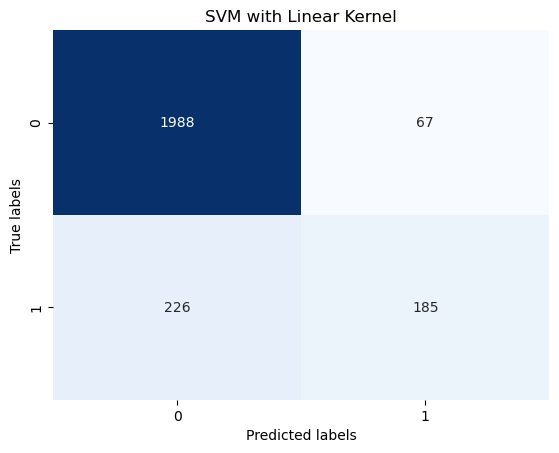

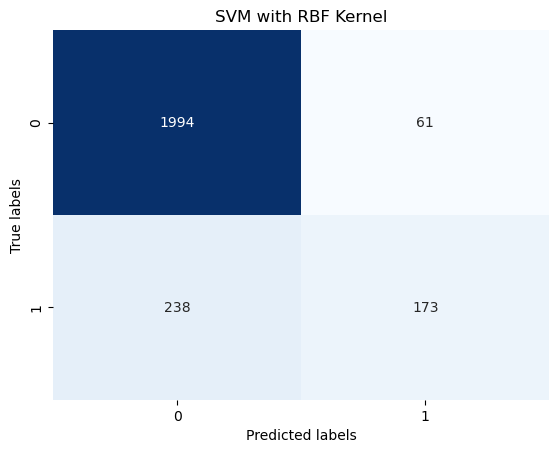

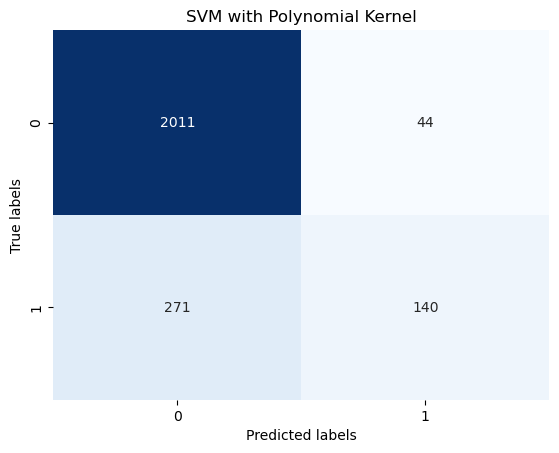

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test, predictions, title):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, predictions, "SVM with Linear Kernel")
plot_confusion_matrix(y_test, predictions_rbf, "SVM with RBF Kernel")
plot_confusion_matrix(y_test, predictions_poly, "SVM with Polynomial Kernel")


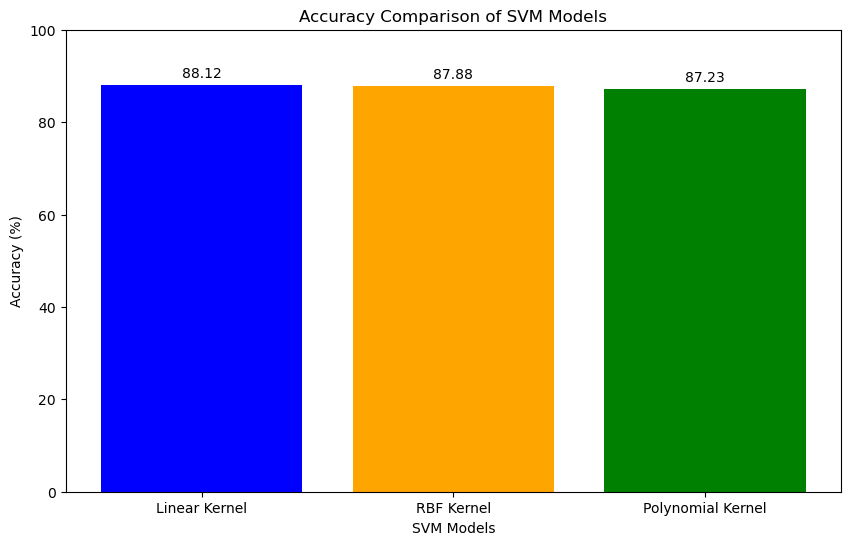

In [8]:
import matplotlib.pyplot as plt

# Calculate accuracies
accuracies = [
    accuracy_score(y_test, predictions) * 100,
    accuracy_score(y_test, predictions_rbf) * 100,
    accuracy_score(y_test, predictions_poly) * 100
]

# Labels for the models
models = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('SVM Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of SVM Models')
plt.ylim(0, 100)

# Show values on each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

plt.show()